In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Loading the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Dropping the species column since clustering is unsupervised
print("Preprocessed Iris dataset:")
display(data.head())

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


Preprocessed Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


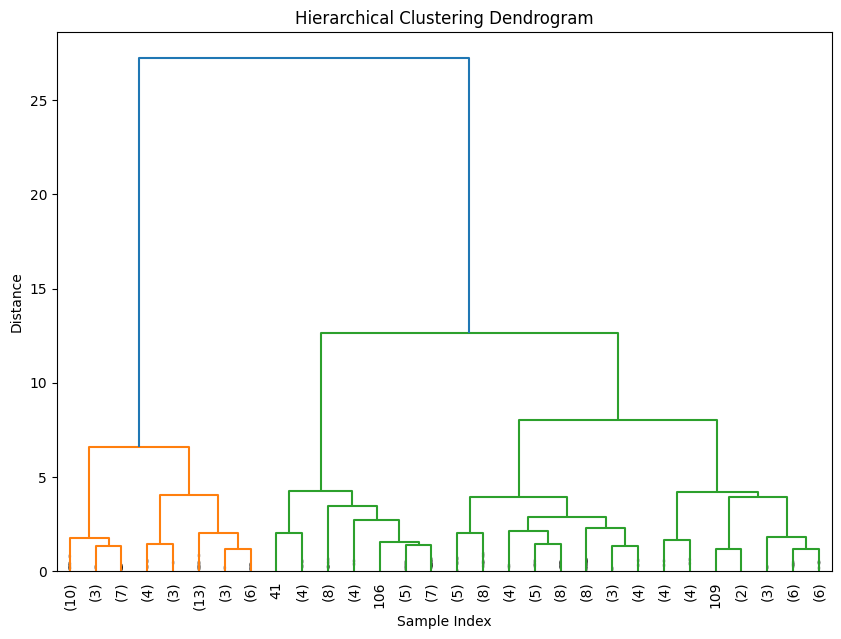

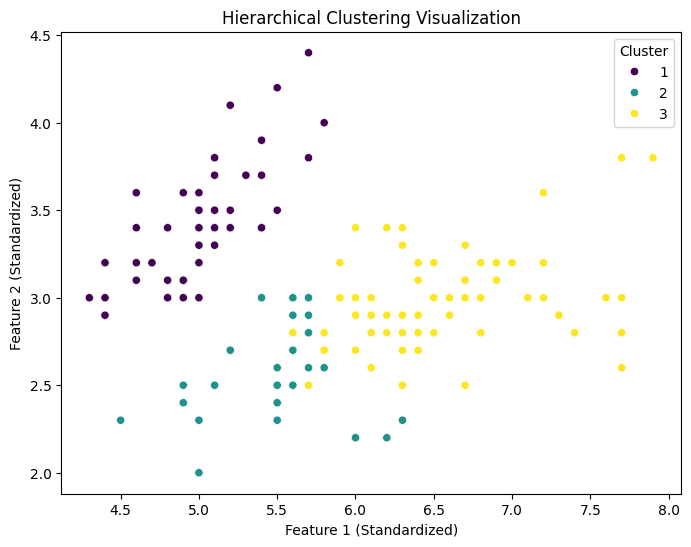

In [4]:
# Importing necessary libraries for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a linkage matrix using Ward's method
linkage_matrix = linkage(data_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # Show only the last p merged clusters
    p=30,                  # Number of clusters shown
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True   # Show contracted branches
)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Determining clusters by cutting the dendrogram
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Adding cluster labels to the dataframe for visualization
data['Hierarchical_Cluster'] = hierarchical_labels

# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data.iloc[:, 0], y=data.iloc[:, 1], hue=hierarchical_labels, palette='viridis'
)
plt.title("Hierarchical Clustering Visualization")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend(title="Cluster", loc="upper right")
plt.show()


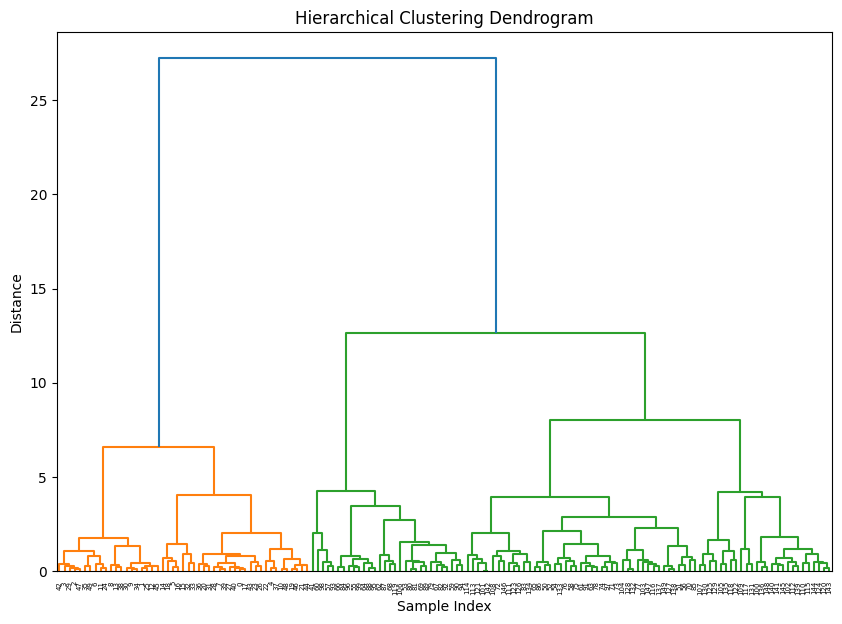

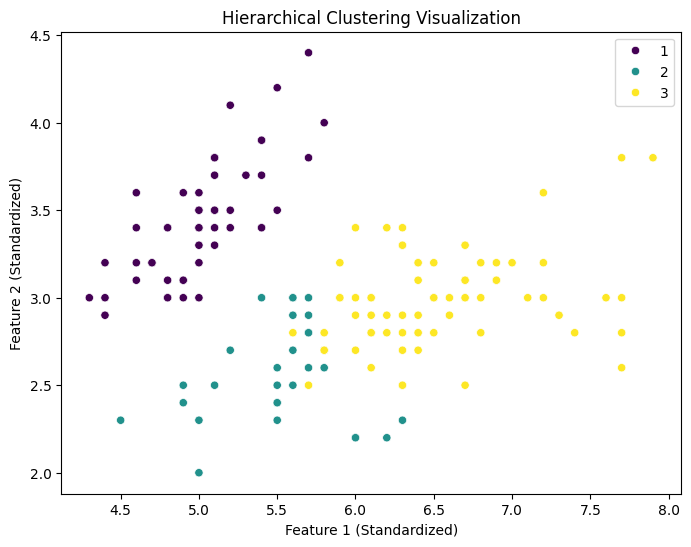

In [3]:
# Importing necessary libraries for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Creating linkage matrix
linkage_matrix = linkage(data_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Cutting the dendrogram at 3 clusters
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Adding hierarchical labels to the dataframe for visualization
data['Hierarchical_Cluster'] = hierarchical_labels

# Visualizing the hierarchical clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data.iloc[:, 0], y=data.iloc[:, 1], hue=hierarchical_labels, palette='viridis'
)
plt.title("Hierarchical Clustering Visualization")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.show()
